In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/Dataset/traffic-sign-dataset-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (5).jpg  
 extracting: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (5).png  
  inflating: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (6).jpg  
 extracting: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (6).png  
  inflating: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (7).jpg  
 extracting: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (7).png  
  inflating: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (8).jpg  
 extracting: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (8).png  
  inflating: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (9).jpg  
 extracting: traffic-sign-dataset-classification/traffic_Data/DATA/30/download (9).png  
  inflating: traffic-sign-dataset-classification/traffic_Da

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.applications import MobileNet, resnet50, InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
sns.set_style('whitegrid')
sns.set()
%matplotlib inline

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True, 
                                   vertical_flip = True,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10)
training_set = train_datagen.flow_from_directory('/content/traffic-sign-dataset-classification/traffic_Data/DATA', 
                                                 target_size = (224,224), 
                                                 batch_size = 32,   
                                                 class_mode = 'categorical')
training_set.class_indices

Found 5829 images belonging to 58 classes.


{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '43': 38,
 '44': 39,
 '45': 40,
 '46': 41,
 '47': 42,
 '48': 43,
 '49': 44,
 '5': 45,
 '50': 46,
 '51': 47,
 '52': 48,
 '53': 49,
 '54': 50,
 '55': 51,
 '56': 52,
 '57': 53,
 '6': 54,
 '7': 55,
 '8': 56,
 '9': 57}

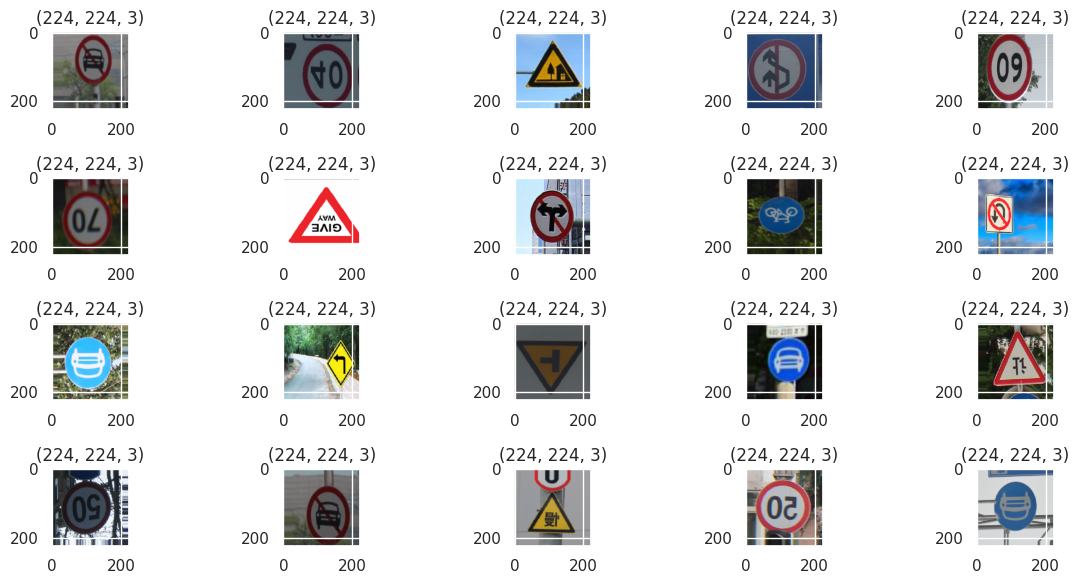

In [ ]:
t_img , label = training_set.next()

def plotImages(img_arr, label):
    fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(12, 6))
    count = 0
    for row in axs:
        for ax in row:
            ax.imshow(img_arr[count])
            ax.set_title(img_arr[count].shape)
            ax.axis = False
            count += 1
            if count == 20:
                break
        if count == 20:
            break
    plt.tight_layout()
    plt.show()
plotImages(t_img, label)

In [ ]:
base_model = InceptionV3(weights= 'imagenet', include_top=False, input_shape= (224,224,3))
x = base_model.output
x= Conv2D(filters=64,kernel_size=(1,1),activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x= Flatten()(x)
x = Dense(256, activation= 'relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(58, activation= 'softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
history=model.fit(training_set, epochs = 30)

Epoch 1/30
183/183 [==============================] - 141s 469ms/step - loss: 2.3526 - accuracy: 0.3867
Epoch 2/30
183/183 [==============================] - 84s 459ms/step - loss: 1.2508 - accuracy: 0.6171
Epoch 3/30
183/183 [==============================] - 84s 458ms/step - loss: 0.8521 - accuracy: 0.7370
Epoch 4/30
183/183 [==============================] - 84s 458ms/step - loss: 0.5465 - accuracy: 0.8266
Epoch 5/30
183/183 [==============================] - 85s 462ms/step - loss: 0.4304 - accuracy: 0.8597
Epoch 6/30
183/183 [==============================] - 83s 455ms/step - loss: 0.3679 - accuracy: 0.8799
Epoch 7/30
183/183 [==============================] - 83s 457ms/step - loss: 0.3322 - accuracy: 0.8899
Epoch 8/30
183/183 [==============================] - 83s 455ms/step - loss: 0.2678 - accuracy: 0.9086
Epoch 9/30
183/183 [==============================] - 84s 457ms/step - loss: 0.2409 - accuracy: 0.9218
Epoch 10/30
183/183 [==============================] - 83s 456ms/step - 

In [ ]:
model.save("/content/drive/MyDrive/Colab_Notebooks/DL Model/traffic_resnet50.h5")

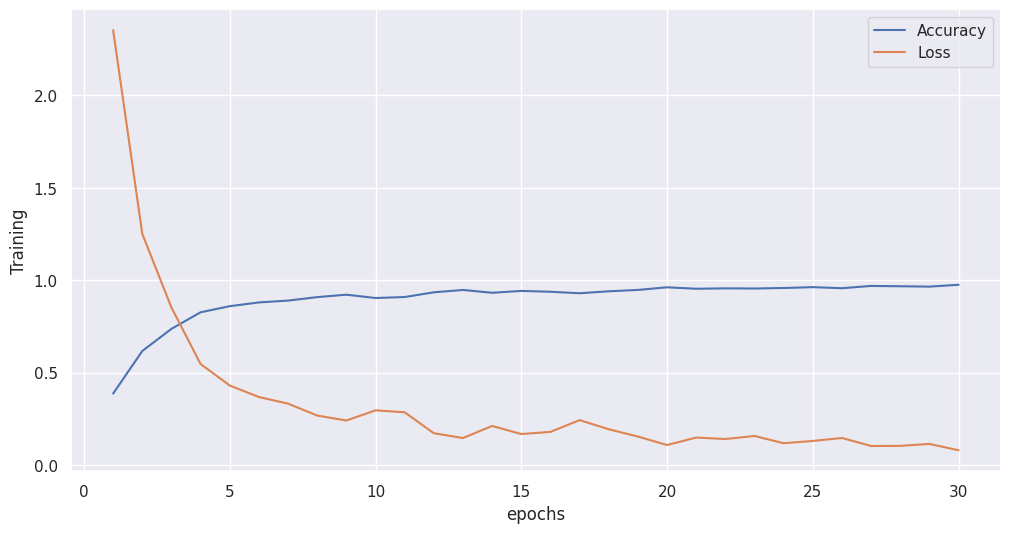

In [ ]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('epochs')
plt.ylabel('Training')
plt.legend();

In [ ]:
df= pd.read_csv('/content/traffic-sign-dataset-classification/class_labels.csv')

0


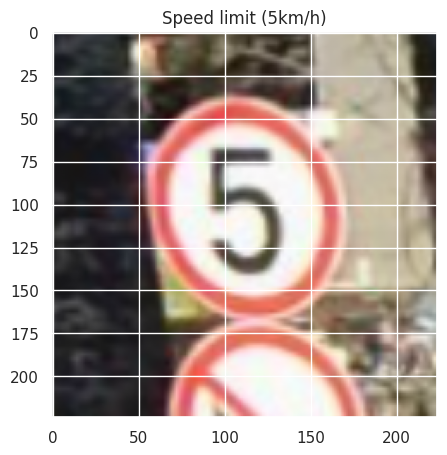

In [ ]:
img = cv2.imread('/content/traffic-sign-dataset-classification/traffic_Data/TEST/000_0002_j.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
gray = cv2.resize(gray, (224, 224))
gray = gray / 255.0 

pred = model.predict(np.expand_dims(gray, axis=0), verbose=False)[0].argmax()
print(pred)
classid_value = pred
filtered_df = df[df['ClassId'] == classid_value]
signature = filtered_df['Name'].values[0]

fig, ax = plt.subplots(figsize=(5, 5))

ax.imshow(gray, cmap='gray')
ax.set_title(signature, fontsize=12)
plt.show()